In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/YOLO_Testing

Mounted at /content/drive
/content/drive/MyDrive/YOLO_Testing


In [20]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pfXfZVibPymTtA0RtXwj")
project = rf.workspace("fpt-capstone-obj-det-project").project("furniture-detection-oescj")
dataset = project.version(2).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled o

loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: ignored

In [3]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 15943, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 15943 (delta 28), reused 34 (delta 12), pack-reused 15880
Receiving objects: 100% (15943/15943), 14.67 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (10923/10923), done.
/content/drive/MyDrive/YOLO_Testing/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [4]:
import torch
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 30 --data /kaggle/input/furnitures/Furniture-Detection-2/data.yaml --weights yolov5m6.pt --freeze 10

In [18]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.9 MB/s eta 0:00:00


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-9 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 276 layers, 35283552 parameters, 0 gradients, 49.0 GFLOPs
Adding AutoShape... 


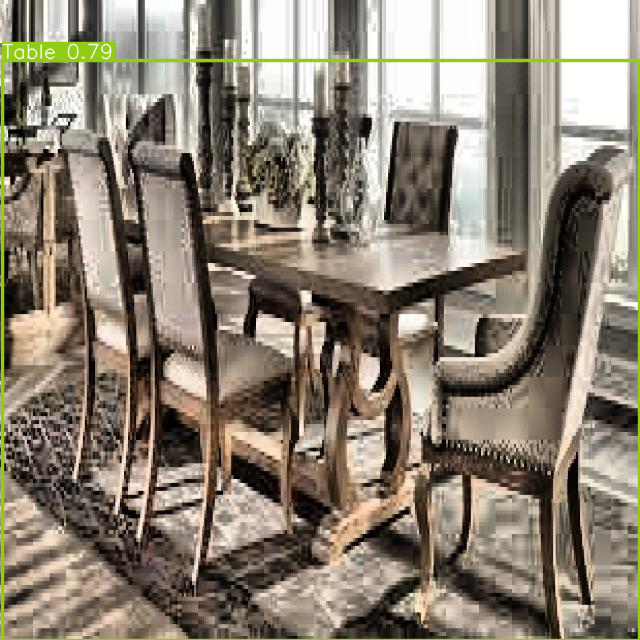

In [19]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)  # or yolov5n - yolov5x6, custom

# Images
img = "/content/drive/MyDrive/YOLO_Testing/Furniture-Detection-2/test/images/46_jpg.rf.0a4eb1bc74e83e92348cc14c03afb9b0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.